<a href="https://colab.research.google.com/github/namespaiva/pi-acidentes/blob/main/acidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento e geração do csv

In [ ]:
!pip install googlemaps
!pip install odfpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import googlemaps
from datetime import datetime
from google.colab import userdata

  Preparing metadata (setup.py) ... canceled
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160671 sha256=6fe25553ee902c120b04c827300df4e5007560370ae4d3b1f594e4c3414dd46f
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


ModuleNotFoundError: No module named 'googlemaps'

In [ ]:
# # Código de tratamento
# for ano in range(2015, 2020):
#   if f'Acidentes {ano}.ods' not in os.listdir():
#     !wget https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/Acidentes%20{ano}.ods

# for ano in range(2020, 2025):
#   if f'Acidentes {ano}.xls' not in os.listdir():
#     !wget https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/Acidentes%20{ano}.xls

# dados = pd.DataFrame()

# for ano in range (2015, 2020):
#   dados = pd.concat([dados, pd.read_excel(f'Acidentes {ano}.ods', engine='odf')])

# dados1 = dados.copy()

# for ano in range(2020, 2025):
#   dados = pd.concat([dados, pd.read_excel(f'Acidentes {ano}.xls')])

# df = dados.sort_values(by=['DATA', 'HORA'])

# df['CRUZAMENTO'] = df['CRUZAMENTO'].astype(str) + df['CRUZAMENTO.1'].astype(str)
# df['LOGRADOURO'] = df['LOGRADOURO'].astype(str) + df['LOGRADOURO1'].astype(str)
# df = df.drop(columns=['LOGRADOURO1', 'CRUZAMENTO.1', 'Unnamed: 0', 2])
# df.rename(columns={'Nº': 'NUMERO'}, inplace=True)
# df.to_csv('acidentes.csv', index=False)

# def remove_nans(s):
#     s = str(s)
#     if s == 'nan':
#         return s
#     elif s.startswith("nan"):
#         return s[3:]  # Skip the first 3 characters if they are "nan"
#     elif s.endswith("nan"):
#         return s[:-3]  # Skip the last 3 characters if they are "nan"
#     else:
#       return s

# df['LOGRADOURO'] = df['LOGRADOURO'].apply(remove_nans)
# df['CRUZAMENTO'] = df['CRUZAMENTO'].apply(remove_nans)

# df['DATA'] = pd.to_datetime(df['DATA'])
# df['NUMERO'] = df['NUMERO'].astype(str)
# df['lat'] = ''
# df['lng'] = ''
# df['types'] = ''
# df['bairro'] = ''
# df.rename(columns={'DATA': 'data', 'HORA': 'hora', 'TEMPO': 'tempo',
#                    'TIPO_ACIDENTE': 'tipo_acidente', 'GRAVIDADE': 'gravidade',
#                    'LOGRADOURO': 'logradouro', 'NUMERO': 'numero', 'CRUZAMENTO': 'cruzamento'}, inplace=True)

In [ ]:
# gravidades = list(df['gravidade'].unique())

# df['gravidade'] = df['gravidade'].apply(lambda x: 'nan' if pd.isna(x) else x)
# df['gravidade'] = df['gravidade'].apply(lambda x: 'nan' if x == ' ' else x)

In [ ]:
# gravidades = list(df['gravidade'].unique())
# gravidades.remove('nan')
# df['temp'] = df['cruzamento']

# new_gravidade_values = []
# new_temp_values = []

# for index, row in df.iterrows():
#     temp_value = row['temp']
#     for gravidade in gravidades:
#         if str(gravidade) in temp_value:
#             new_gravidade_values.append(str(gravidade))
#             temp_value = temp_value.replace(str(gravidade), '')
#             break
#     else:
#         new_gravidade_values.append(np.nan)

#     new_temp_values.append(temp_value)

# df['temp'] = new_temp_values

# df['cruzamento'] = df['temp']
# df.drop(columns=['temp'], axis=1, inplace=True)

In [ ]:
# df[df['data'].dt.year == 2021]
# df['cruzamento'] = df['cruzamento'].apply(lambda x: 'nan' if x == '' else x)
# df['cruzamento'].unique()

In [ ]:
# !wget https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/Acidentes%202021.xls

# df = pd.read_csv('acidentes.csv')
# df['data'] = pd.to_datetime(df['data'])
# df.sort_values(by=['data', 'hora'], inplace=True)
# df.reset_index(drop=True, inplace=True)

# df2021 = pd.read_excel('Acidentes 2021.xls')

# mask_2021 = df['data'].dt.year == 2021

# # Check if the number of rows matches
# if len(df2021) == sum(mask_2021):
#     # Update 'gravidade' column where the year is 2021
#     df.loc[mask_2021, 'gravidade'] = df2021['CRUZAMENTO'].values
# else:
#     print("Erro filtrando df")

In [ ]:
df = pd.read_csv('acidentes.csv')
df.sort_values(by=['data', 'hora'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
chave = userdata.get('chave')

gmaps = googlemaps.Client(key=chave)

In [ ]:
for index, row in df.iterrows():
  if pd.isna(row['cruzamento']):
    local = str(row['numero']) + ' ' + str(row['logradouro'])
  else:
    local = str(row['logradouro']) + ' ' + str(row['cruzamento'])

  geocode_result = gmaps.geocode(f'{local}, Santos, SP, Brazil')

  if pd.isna(row['cruzamento']):
    if len(geocode_result[0]['address_components']) > 2 and 'long_name' in geocode_result[0]['address_components'][2]:
      df.at[index, 'bairro'] = geocode_result[0]['address_components'][2]['long_name']
    else:
      print(index)
      df.at[index, 'bairro'] = 'Bairro não encontrado'
  else:
    if len(geocode_result[0]['address_components']) > 2 and 'long_name' in geocode_result[0]['address_components'][2]:
      df.at[index, 'bairro'] = geocode_result[0]['address_components'][1]['long_name']
    else:
      print(index)
      df.at[index, 'bairro'] = 'Bairro não encontrado'

  df.at[index, 'types'] = geocode_result[0]['types']
  df.at[index, 'lat'] = geocode_result[0]['geometry']['location']['lat']
  df.at[index, 'lng'] = geocode_result[0]['geometry']['location']['lng']

df.head(10)

In [ ]:
df.to_csv('acidenteslats.csv', index=False)

# Análise

In [30]:
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

if 'acidentes.csv' not in os.listdir():
  !wget https://raw.githubusercontent.com/namespaiva/pi-acidentes/main/dados/acidentes.csv

dados = pd.read_csv('acidentes.csv')

dados.sort_values(by=['data', 'hora'], inplace=True)
dados.reset_index(drop=True, inplace=True)
dados['data'] = pd.to_datetime(dados['data'])
dados['dia_semana'] = (dados['data'].dt.dayofweek)
dias = {0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7, 6: 1}
dados['dia_semana'] = dados['dia_semana'].map(dias)
dados.sample(1)

data      hora tempo tipo_acidente gravidade  \
5974 2015-11-14  16:50:00   BOM        CHOQUE  S/ LESÃO   

                     logradouro  numero cruzamento       lat        lng  \
5974  Rua 07 - Pantanal de Cima      78        NaN -23.95922 -46.331779   

                                             types  bairro  dia_semana  
5974  ['administrative_area_level_2', 'political']  Brazil           7

In [31]:
df = dados.copy()
# df = df[df['data'].dt.year > 2017]
import plotly.express as px

px.scatter(data_frame=df, x='lat', y='lng', width=700, height=500)

In [32]:
dfnum = dados.copy()
cols = ['gravidade', 'tempo', 'tipo_acidente', 'logradouro', 'cruzamento']

for col in cols:
  cats = list(dfnum[col].unique())
  for i, cat in enumerate(cats):
    dfnum.loc[dfnum[col] == cat, col] = i

In [33]:
cols.append('data')
cols.append('hora')
cols.append('dia_semana')
cols.append('lat')
cols.append('lng')
dfnum['data'] = dfnum['data'].apply(lambda x: int(x.timestamp()))
dfnum['hora'] = pd.to_datetime(dfnum['hora']).dt.hour * 3600 + pd.to_datetime(dfnum['hora']).dt.minute * 60 + pd.to_datetime(dfnum['hora']).dt.second
dfnum = dfnum[cols]
dfnum.describe()

<ipython-input-33-b8ac5530364b>:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-33-b8ac5530364b>:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-33-b8ac5530364b>:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



data          hora    dia_semana           lat           lng
count  3.359900e+04  33599.000000  33599.000000  33599.000000  33599.000000
mean   1.531137e+09  49386.193041      4.129944    -23.955649    -46.332780
std    8.584791e+07  19269.390660      1.894147      0.015508      0.019442
min    1.420070e+09      0.000000      1.000000    -23.991168    -46.408906
25%    1.459382e+09  35880.000000      3.000000    -23.967712    -46.343837
50%    1.505261e+09  50400.000000      4.000000    -23.957266    -46.331659
75%    1.597190e+09  64680.000000      6.000000    -23.943116    -46.320182
max    1.717114e+09  86340.000000      7.000000    -23.883244    -46.188488

<Axes: >

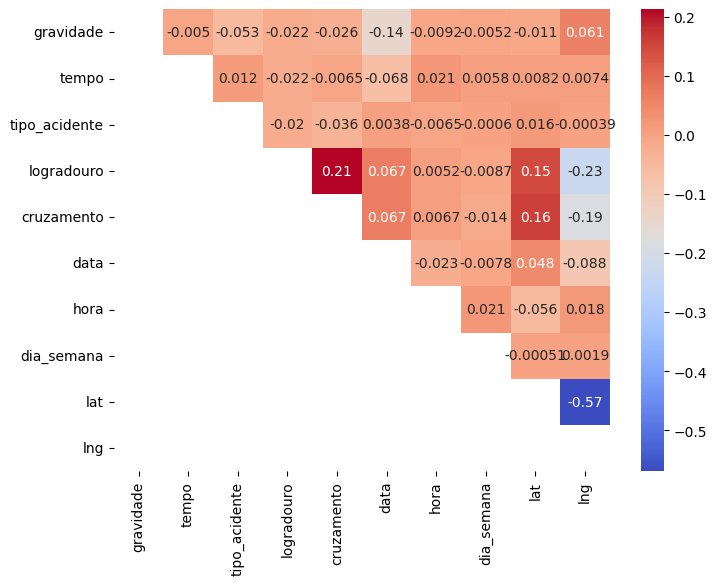

In [50]:
color = sns.color_palette("Paired")
mask = np.tril(np.ones_like(dfnum.corr(), dtype=bool))
plt.figure(figsize=(8, 6))
# sns.heatmap(dfnum.corr(), mask=mask, cmap= 'coolwarm', annot=True)

<Axes: >

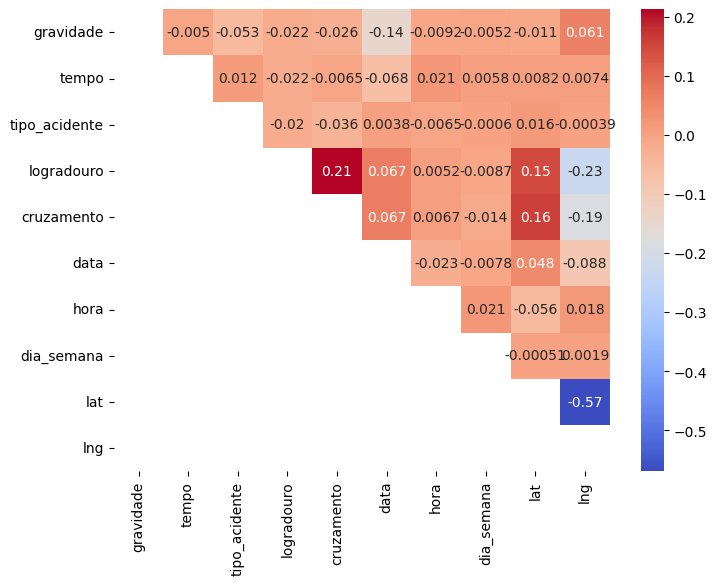

In [35]:
dfnorm = dfnum.copy()

dfnorm = (dfnorm - dfnorm.min()) / (dfnorm.max() - dfnorm.min())

color = sns.color_palette("Paired")
mask = np.tril(np.ones_like(dfnorm.corr(), dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(dfnorm.corr(), mask=mask, cmap= 'coolwarm', annot=True)

In [43]:
!pip install plotly
!pip install hdbscan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import hdbscan

# df = dados.copy()
# df = df[df['data'].dt.year > 2017]

# coords = df[['lat', 'lng']].values

# db = DBSCAN(eps=0.1, min_samples=30).fit(coords)
# df['dbscan_cluster'] = db.labels_

# fig_dbscan = px.scatter(df, x='lng', y='lat', color='dbscan_cluster',
#                        color_continuous_scale='viridis', title='DBSCAN Clustering',
#                        labels={'lng': 'Longitude', 'lat': 'Latitude'},  width=700, height=500)

# fig_dbscan.update_layout(legend_title_text='DBSCAN Cluster')

# fig_dbscan.show()

In [45]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler

df = dfnum.copy()
#df = df[df['data'].dt.year > 2017]

#coords = df[['lat', 'lng', 'logradouro']].values
coords = df[['lat', 'lng']].values

# Normalizar as coordenadas
scaler = StandardScaler()
coords = scaler.fit_transform(coords)

hdb = HDBSCAN(metric='manhattan', min_cluster_size=180,
              min_samples=5, cluster_selection_epsilon=0.0005,
              cluster_selection_method='eom').fit(coords)

df['hdbscan_cluster'] = hdb.labels_
fig = go.Figure()

unique_clusters = df['hdbscan_cluster'].unique()
for cluster in unique_clusters:
    cluster_df = df[df['hdbscan_cluster'] == cluster]
    fig.add_trace(go.Scattermapbox(
        lat=cluster_df['lat'],
        lon=cluster_df['lng'],
        mode='markers',
        marker=dict(size=8, opacity=0.7),
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    title='HDBSCAN Clustering',
    mapbox=dict(
        style="carto-darkmatter",
        center=dict(lat=df['lat'].mean(), lon=df['lng'].mean()),
        zoom=12
    ),
    showlegend=True
)

In [46]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler


df = dados.copy()
df = df[df['gravidade'] == 'S/ LESÃO']
#df = df[df['data'].dt.year > 2017]

#coords = df[['lat', 'lng', 'logradouro']].values
coords = df[['lat', 'lng']].values

# Normalize the coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

hdb = HDBSCAN(metric='manhattan', min_cluster_size=160,
              min_samples=5, cluster_selection_method='eom').fit(coords)
#hdb = AgglomerativeClustering(n_clusters=None, distance_threshold=0.05, compute_full_tree=True).fit(coords)
df['hdbscan_cluster'] = hdb.labels_
fig = go.Figure()

unique_clusters = df['hdbscan_cluster'].unique()
for cluster in unique_clusters:
    cluster_df = df[df['hdbscan_cluster'] == cluster]
    fig.add_trace(go.Scattermapbox(
        lat=cluster_df['lat'],
        lon=cluster_df['lng'],
        mode='markers',
        marker=dict(size=8, opacity=0.7),
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    title='HDBSCAN Clustering para Acidentes Sem Lesão',
    mapbox=dict(
        style="carto-darkmatter",
        center=dict(lat=df['lat'].mean(), lon=df['lng'].mean()),
        zoom=12
    ),
    showlegend=True
)

In [54]:
df = dados.copy()
#df = df[df['gravidade'] == 'C/ VÍTIMAS GRAVES']

# A quantidade de acidentes cai drasticamente depois de 1017
dfano = df[df['data'].dt.year > 2017]
dfano = dfano[dfano['data'].dt.month == 1]
dfano = df

tl = folium.TileLayer('https://{s}.basemaps.cartocdn.com/rastertiles/voyager/{z}/{x}/{y}{r}.png',
                      attr='<a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors; <a href="https://carto.com/attributions">CARTO</a>', #Make sure that the `attr` is not empty and contains valid HTML.
                      subdomains='abcd',
                      maxZoom=20,
                      control=False)

m = folium.Map(location=[-23.959, -46.332], zoom_start=13, tiles=tl)

heat_data = [[row['lat'], row['lng']] for index, row in dfano.iterrows()]
HeatMap(heat_data,radius=13, control=False).add_to(m)
m

In [48]:
import pandas as pd

# Data with latitude/longitude and values
df = dados.copy()

fig = px.density_mapbox(df, lat = 'lat', lon = 'lng',
                        radius = 5,
                        center = dict(lat = -23.959, lon = -46.332),
                        zoom = 13,
                        mapbox_style = 'open-street-map',
                        opacity = 0.7,
                        color_continuous_scale='rainbow')
fig.show()

In [49]:
# Heatmap por mês de cada ano

df = dados.copy()
df['mes'] = df['data'].dt.month

heat_data = []
for _, group in df.groupby(pd.Grouper(key='data', freq='M')):
    heat_data.append([[row['lat'], row['lng'], 1] for _, row in group.iterrows()])

index = list(range(len(heat_data)))

m = folium.Map(location=[-23.959, -46.332], zoom_start=13, height=500, width=1000)

hm = folium.plugins.HeatMapWithTime(heat_data, index=index, auto_play=True, max_opacity=0.3, radius=15, gradient={'0':'Navy', '0.25':'Blue','0.5':'Green', '0.75':'Yellow','1': 'Red'})
hm.add_to(m)

m